In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/ML_LP3/uber.csv')

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.isnull().any()

,0
Unnamed: 0,False
key,False
fare_amount,False
pickup_datetime,False
pickup_longitude,False
pickup_latitude,False
dropoff_longitude,True
dropoff_latitude,True
passenger_count,False


In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [10]:
df.dropna(inplace=True)

df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace
= True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inpl
 ace = True)

In [11]:
df.shape

(199999, 9)

In [13]:
df=df.drop(['Unnamed: 0','key'],axis=1)

In [14]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

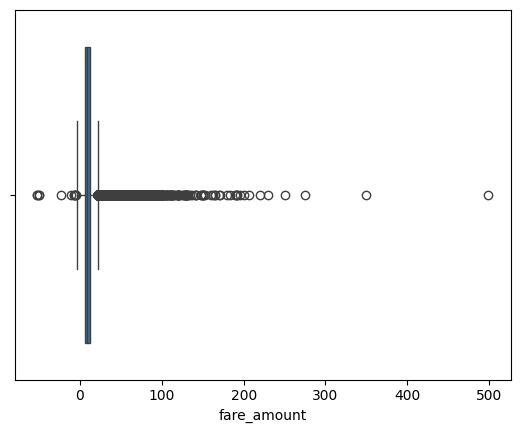

In [15]:
sns.boxplot(data=df,x='fare_amount')
plt.show()

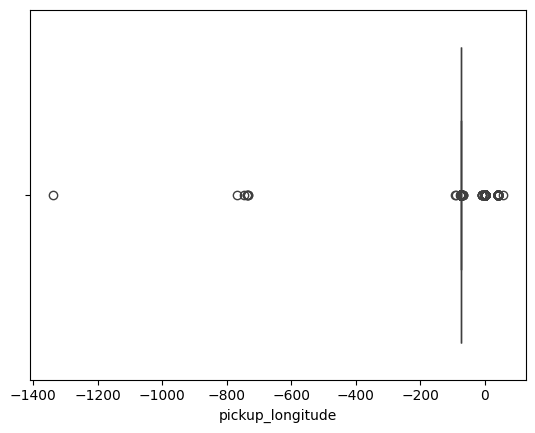

In [17]:
sns.boxplot(data=df,x='pickup_longitude')
plt.show()

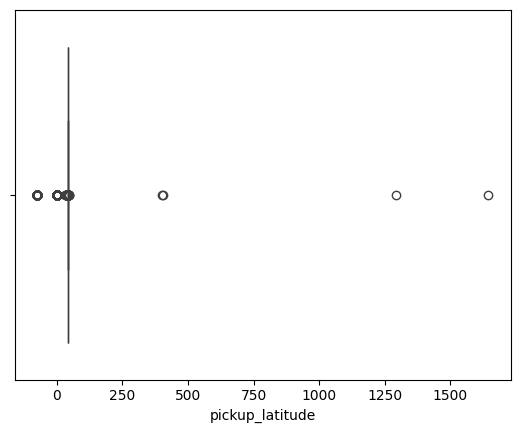

In [18]:
sns.boxplot(data=df,x='pickup_latitude')
plt.show()

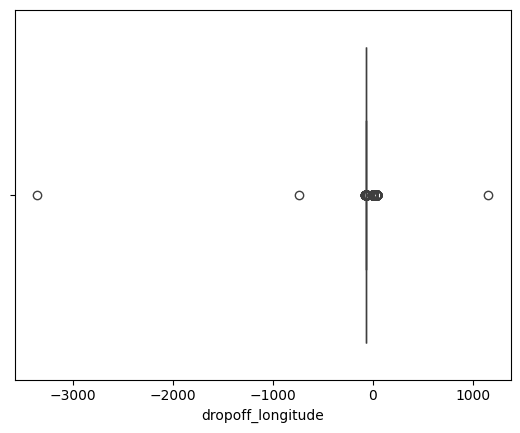

In [19]:
sns.boxplot(data=df,x='dropoff_longitude')
plt.show()

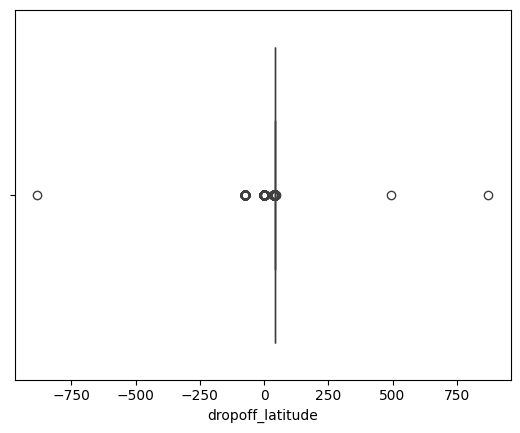

In [20]:
sns.boxplot(data=df,x='dropoff_latitude')
plt.show()

In [21]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime,errors='coerce')

In [23]:
df=df.assign(
    second=df.pickup_datetime.dt.second,
    minute=df.pickup_datetime.dt.minute,
    hour=df.pickup_datetime.dt.hour,
    day=df.pickup_datetime.dt.day,
    month=df.pickup_datetime.dt.month,
    year = df.pickup_datetime.dt.year,
    dayofweek = df.pickup_datetime.dt.dayofweek
)
df.drop(['pickup_datetime'],axis=1,inplace=True)

In [24]:
df = df[
    (df.pickup_latitude > -90) & (df.pickup_latitude < 90) &
    (df.dropoff_latitude > -90) & (df.dropoff_latitude < 90) &
    (df.pickup_longitude > -180) & (df.pickup_longitude < 180) &
    (df.dropoff_longitude > -180) & (df.dropoff_longitude < 180) &
    (df.fare_amount > 0) & (df.passenger_count > 0)  & (df.passenger_count < 50)
]

In [25]:
from math import cos, asin, sqrt, pi
import numpy as np

def distance(lat_1,lon_1,lat_2,lon_2):
#     lat1 = row.pickup_latitude
#     lon1 = row.pickup_longitude
#     lat2 = row.dropoff_latitude
#     lon2 = row.dropoff_longitude
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians


    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1


    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +  np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))

    return km

In [26]:
temp = distance(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
temp.head()

,0
0,1.683323
1,2.457590
2,5.036377
3,1.661683
4,4.475450


In [27]:
df_new = df.copy()
df_new['Distance'] = temp
df = df_new
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,6,52,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,56,4,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,45,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,21,22,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0,47,17,28,8,2014,3,4.475450


In [28]:
for col in df.columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lb=Q1-1.5*IQR
  ub=Q3+1.5*IQR
  df=df[(df[col]>=lb) & (df[col]<=ub)]

In [29]:
df.shape

(141495, 14)

In [30]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
fare_amount,1.000000,-0.050741,-0.067154,-0.027868,-0.099441,0.018151,0.006579,-0.008129,0.016865,0.008242,0.033858,0.181597,0.005442,0.768664
pickup_longitude,-0.050741,1.000000,0.685174,0.479073,0.432777,-0.022073,-0.003717,-0.005349,0.013152,-0.004656,-0.002411,-0.002853,-0.037317,-0.046760
pickup_latitude,-0.067154,0.685174,1.000000,0.409506,0.603531,-0.018763,-0.003607,-0.001798,0.033207,-0.002101,0.002607,-0.001748,-0.054228,-0.054376
dropoff_longitude,-0.027868,0.479073,0.409506,1.000000,0.640056,-0.019349,-0.000212,-0.003282,0.003265,-0.010192,-0.004580,0.003523,-0.034510,0.006669
dropoff_latitude,-0.099441,0.432777,0.603531,0.640056,1.000000,-0.016208,-0.000267,-0.000880,0.029640,-0.006650,-0.000021,-0.000239,-0.046297,-0.045856
passenger_count,0.018151,-0.022073,-0.018763,-0.019349,-0.016208,1.000000,-0.053409,-0.002590,0.035047,0.000812,0.005862,-0.023678,0.064520,0.013725
second,0.006579,-0.003717,-0.003607,-0.000212,-0.000267,-0.053409,1.000000,0.002437,-0.014173,-0.003248,-0.043122,0.073646,0.000510,0.004370
minute,-0.008129,-0.005349,-0.001798,-0.003282,-0.000880,-0.002590,0.002437,1.000000,-0.003833,-0.001769,-0.003738,-0.003395,-0.002298,-0.007352
hour,0.016865,0.013152,0.033207,0.003265,0.029640,0.035047,-0.014173,-0.003833,1.000000,0.002916,-0.003291,0.005462,-0.076333,0.001122
day,0.008242,-0.004656,-0.002101,-0.010192,-0.006650,0.000812,-0.003248,-0.001769,0.002916,1.000000,-0.017836,-0.009136,0.006350,0.008695


In [31]:
df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [32]:
df.shape

(141495, 10)

In [33]:
df.columns

Index(['fare_amount', 'passenger_count', 'second', 'minute', 'hour', 'day',
       'month', 'year', 'dayofweek', 'Distance'],
      dtype='object')

In [34]:
x=df[['Distance']].values
y=df['fare_amount'].values.reshape(-1,1)

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [41]:
ytrain=sc.fit_transform(ytrain)
ytest=sc.transform(ytest)

In [42]:
m1=LinearRegression()
m1.fit(xtrain,ytrain)

LinearRegression()

In [43]:
ypred=m1.predict(xtest)

In [44]:
r_squared = r2_score(ytest,ypred)
RMSE = np.sqrt(mean_squared_error(ytest, ypred))
MAE = mean_absolute_error(ytest,ypred)
print('R-squared: ', r_squared)
print('RMSE: ', RMSE)
print("MAE:  ",MAE)

R-squared:  0.5938468626265346
RMSE:  0.6355692936018074
MAE:   0.45633610048779943


In [45]:
m2=RandomForestRegressor()
m2.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [46]:
y_pred=m2.predict(xtest)

In [47]:
r_squared = r2_score(ytest,y_pred)
RMSE = np.sqrt(mean_squared_error(ytest, y_pred))
MAE = mean_absolute_error(ytest,y_pred)
print('R-squared: ', r_squared)
print('RMSE: ', RMSE)
print("MAE:  ",MAE)

R-squared:  0.4308905000227268
RMSE:  0.7523430585244665
MAE:   0.543216320077858


Also Refer B1.ipynb in local computer storage.